### Importacion de las librerias

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
import riskfolio as rp

import warnings
warnings.filterwarnings('ignore')

### Fechas, Tickers y sus retornos

In [ ]:
tickers = ['GGAL', 'YPF', 'BBAR', 'BMA','CEPU','CRESY','EDN','IRS','LOMA','PAM','SUPV','TEO','TGS','TS','TX']
start = datetime.now() - timedelta(days=10*365)
end = datetime.now()
df = yf.download(tickers, start, end)

returns = df['Close'].pct_change().dropna()

### Variables del modelo

In [14]:
method_mu ='hist'
method_cov = 'hist'
hist = True
model = 'Classic'
rm = 'MV'
obj = 'Sharpe'
rf = 0 #Tasa libre de riesgo
l = 0

### Optimizacion

In [15]:
port = rp.Portfolio(returns = returns)
port.assets_stats(method_mu=method_mu, method_cov=method_cov )
w = port.optimization(model=model, rm=rm , obj=obj , rf=rf , l=l , hist=hist)

### Plots

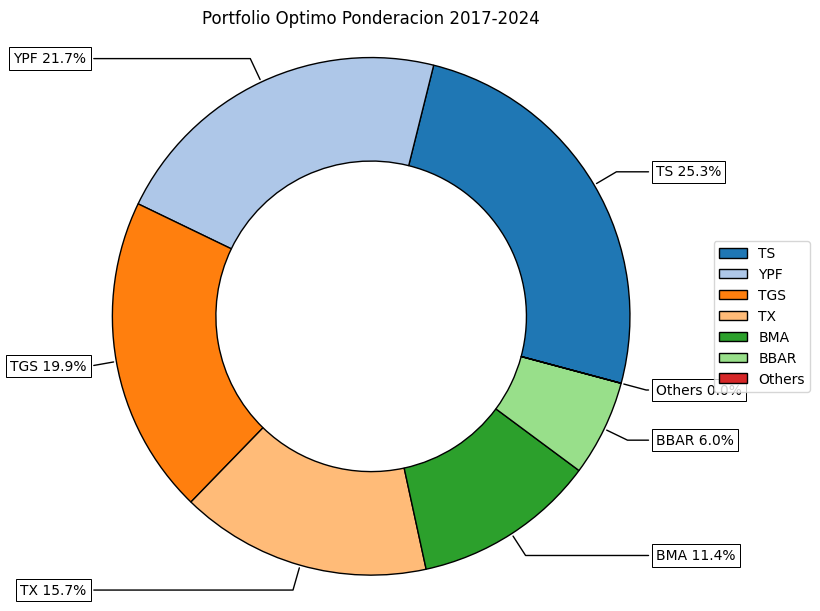

In [16]:
ax = rp.plot_pie(w, title='Portfolio Optimo Ponderacion 2017-2024', cmap = 'tab20')
plt.show()

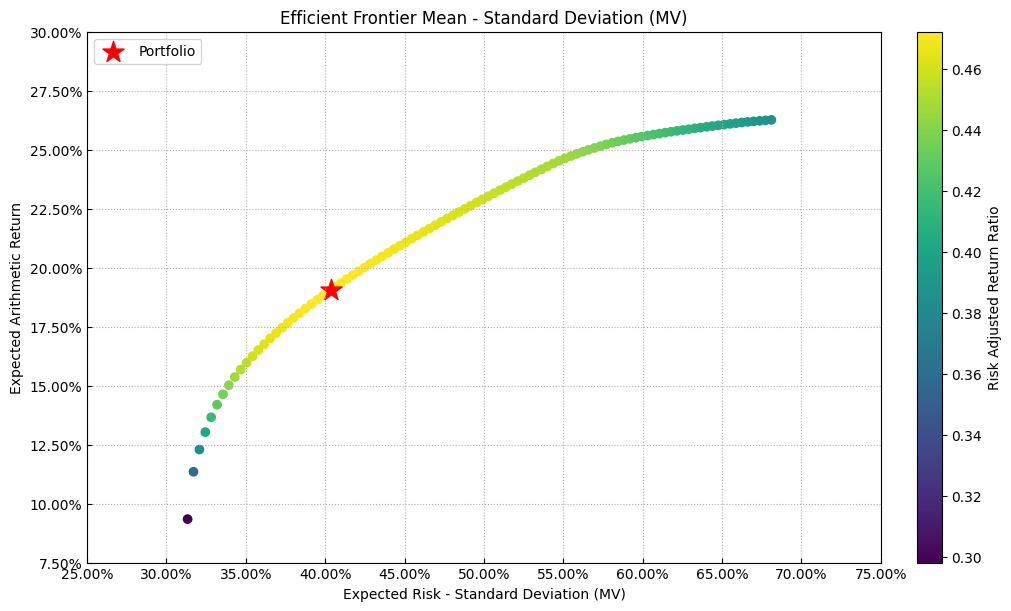

In [17]:
frontier = port.efficient_frontier(model=model, rm=rm , points=100, rf=rf, hist=hist)

ax = rp.plot_frontier(w_frontier=frontier, mu=port.mu, cov=port.cov, returns = returns, rm=rm, rf=rf, cmap='viridis', w=w)
plt.show()

### Reporte

<function matplotlib.pyplot.show(close=None, block=None)>

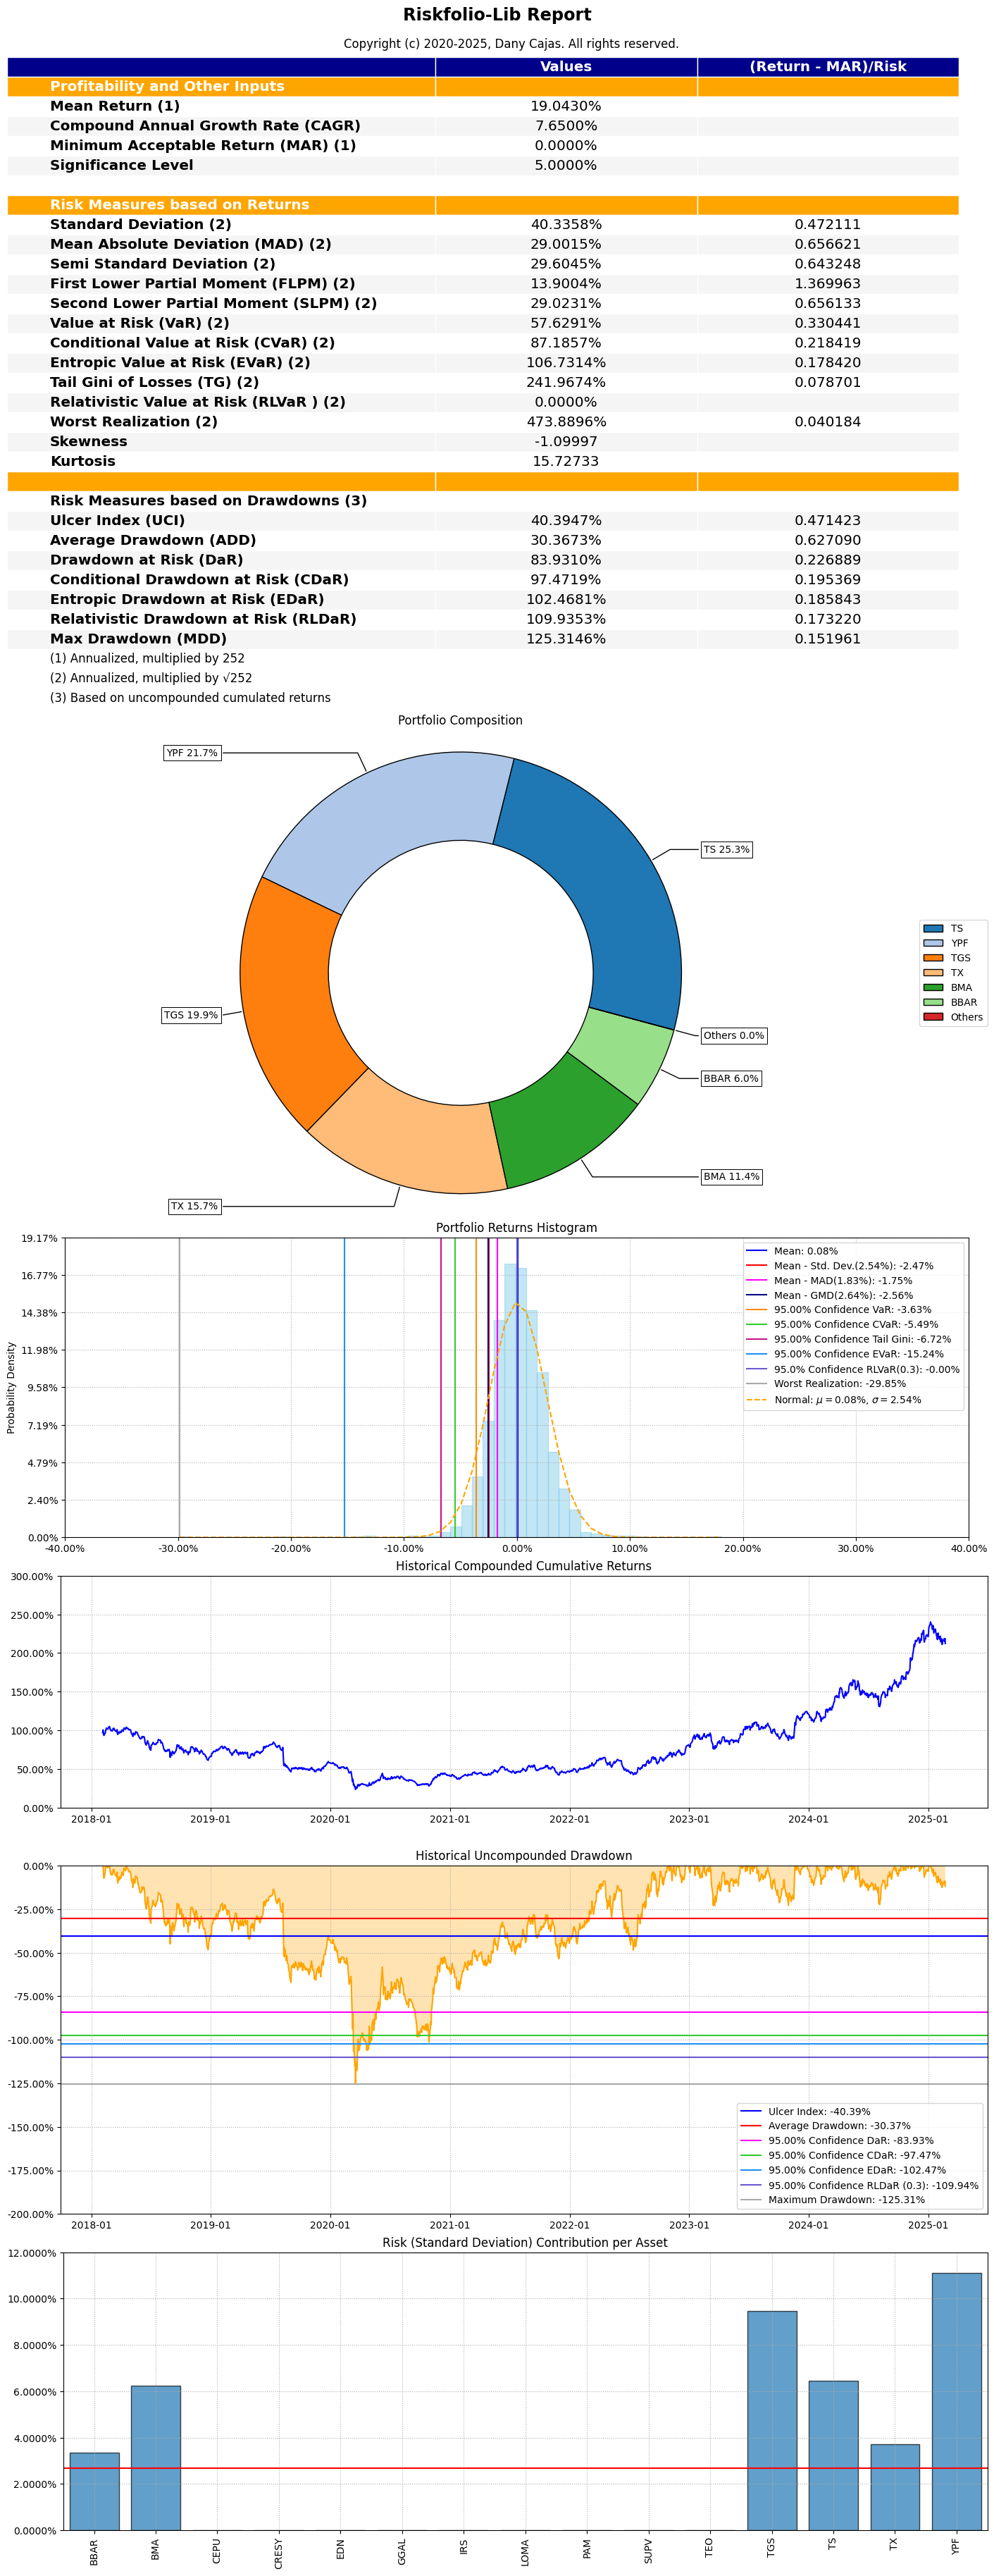

In [18]:
ax = rp.jupyter_report(returns,
                       w,
                       rm='MV',
                       rf=0,
                       alpha=0.05,
                       height=6,
                       width=14,
                       others=0.05,
                       nrow=25)
plt.show